In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pyglstudy as gl
from pyglstudy.group_lasso import *
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [3]:
n = 100
p = 50000
n_groups = int(p / 500)
alpha = 1.0
seed = 0

np.random.seed(seed)
X, beta, y, groups, group_sizes = generate_group_lasso_data(n, p, n_groups).values()

# IMPORTANT: pack must be created before calling the next cell.
# group_lasso will modify the pack details
pack = generate_group_lasso_state(
    X, y, groups, group_sizes, alpha, 
    log10_min_ratio=-2, 
    max_cds=int(1e5),
)

In [4]:
pack1 = deepcopy(pack)

In [5]:
%%time
gl_out = group_lasso(X, pack1, full_cov=False)

CPU times: user 880 ms, sys: 190 ms, total: 1.07 s
Wall time: 876 ms


In [32]:
A = np.asfortranarray(X.T @ X)
pack2 = deepcopy(pack)

In [33]:
%%time
gl_out_2 = group_lasso(A, pack2, full_cov=True)

CPU times: user 61.1 ms, sys: 359 µs, total: 61.4 ms
Wall time: 61.4 ms


In [6]:
gl_out['rsqs'] / np.linalg.norm(y) ** 2

array([0.        , 0.08860494, 0.16933846, 0.24289983, 0.30992622,
       0.37099817, 0.42664466, 0.47734766, 0.52354636, 0.56564088,
       0.60399585, 0.63894347, 0.67078644, 0.69980057, 0.72623717,
       0.75032521, 0.77227334, 0.79227166, 0.81049338, 0.82709634,
       0.84222434, 0.85600841, 0.86856794, 0.88001173, 0.89043887,
       0.89993971, 0.90859651, 0.91648427, 0.92367131, 0.93021988,
       0.93618669, 0.94162342, 0.94657718, 0.95109086, 0.95520356,
       0.9589509 , 0.96236534, 0.96547646, 0.9683112 , 0.97089411,
       0.97324756, 0.97539195, 0.97734584, 0.97912616, 0.98074832,
       0.98222638, 0.98357313, 0.98480026, 0.98591837, 0.98693716,
       0.98786545, 0.98871128, 0.98948197, 0.99018421, 0.99082407,
       0.99140709, 0.99193833, 0.99242239, 0.99286345, 0.99326534,
       0.99363153, 0.99396521, 0.99426925, 0.9945463 , 0.99479875,
       0.99502878, 0.99523839, 0.99542939, 0.99560344, 0.99576205,
       0.99590658, 0.99603829, 0.99615831, 0.9962677 , 0.99636

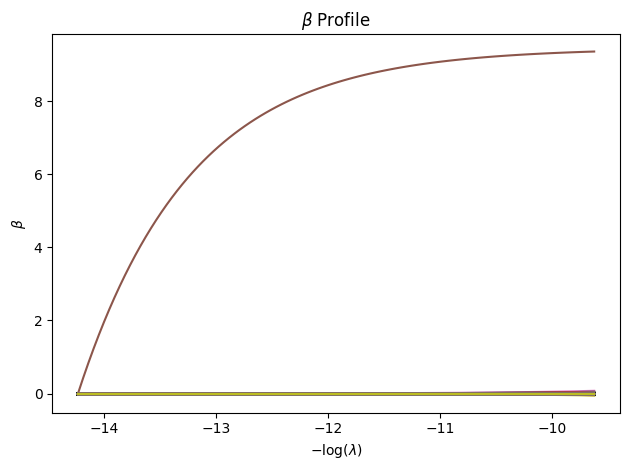

In [7]:
worst_idx = np.unravel_index(np.argmin(gl_out['betas']), shape=gl_out['betas'].shape)[0]

for j in range(gl_out['betas'].shape[0]):
    if j == worst_idx: continue
    plt.plot(-np.log(gl_out['lmdas']), gl_out['betas'][j].todense().reshape((-1,1)))
plt.title('$\\beta$ Profile')
plt.xlabel('$-\log(\lambda)$')
plt.ylabel('$\\beta$')
plt.tight_layout()
plt.show()

In [52]:
gl_out['betas'] != gl_out_2['betas']

<10000x100 sparse matrix of type '<class 'numpy.bool_'>'
	with 0 stored elements in Compressed Sparse Column format>